In [1]:
import numpy as np
import math
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

In [2]:
df=pd.read_csv('steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [3]:
df.shape

(35040, 11)

In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [7]:
#rename the Lagging Current Reactive Power
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh'})

In [8]:
# Creating a pivot table to show the highest energy consumption at any registered time
max_energy_consumption = pd.pivot_table(df, index = 'date', values ='Usage_kWh', aggfunc = {'Usage_kWh':np.max})
max_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


In [9]:
max_energy_consumption.tail(10)

,Usage_kWh
date,
31/12/2018 21:30,3.49
31/12/2018 21:45,3.42
31/12/2018 22:00,3.42
31/12/2018 22:15,3.24
31/12/2018 22:30,3.67
31/12/2018 22:45,3.82
31/12/2018 23:00,3.85
31/12/2018 23:15,3.74
31/12/2018 23:30,3.78


In [10]:
# Check whether date is in datetime format
df['date'].dtype

dtype('O')

In [11]:
# Transform the date column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35035   2018-12-31 23:00:00
35036   2018-12-31 23:15:00
35037   2018-12-31 23:30:00
35038   2018-12-31 23:45:00
35039   2018-12-31 00:00:00
Name: date, Length: 35040, dtype: datetime64[ns]

In [12]:
df['month']=df['date'].dt.month
# Creating a pivot table to show the highest monthly energy consumption and transform it into a data frame
max_energy_consumption = pd.pivot_table(df, index = 'month', values ='Usage_kWh', aggfunc = {'Usage_kWh':np.max}).reset_index()
max_energy_consumption

,month,Usage_kWh
0,1,153.14
1,2,147.46
2,3,151.31
3,4,144.29
4,5,146.88
5,6,131.65
6,7,131.33
7,8,145.30
8,9,138.64
9,10,143.21


In [13]:
# Creating a pivot table to show the lowest monthly energy consumption and transform it into a data frame
min_energy_consumption = pd.pivot_table(df, index = 'month', values ='Usage_kWh', aggfunc = {'Usage_kWh':np.min}).reset_index()
min_energy_consumption

,month,Usage_kWh
0,1,2.45
1,2,2.52
2,3,2.59
3,4,2.48
4,5,2.48
5,6,2.48
6,7,0.00
7,8,2.48
8,9,2.45
9,10,2.52


In [14]:
# Creating a pivot table to show the average monthly energy consumption and transform it into a data frame
avg_energy_consumption = pd.pivot_table(df, index = 'month', values ='Usage_kWh', aggfunc = {'Usage_kWh':np.mean}).reset_index()
avg_energy_consumption

,month,Usage_kWh
0,1,33.876300
1,2,29.330588
2,3,27.107282
3,4,25.923153
4,5,28.636166
5,6,25.909760
6,7,27.497762
7,8,28.021788
8,9,20.581271
9,10,27.564022


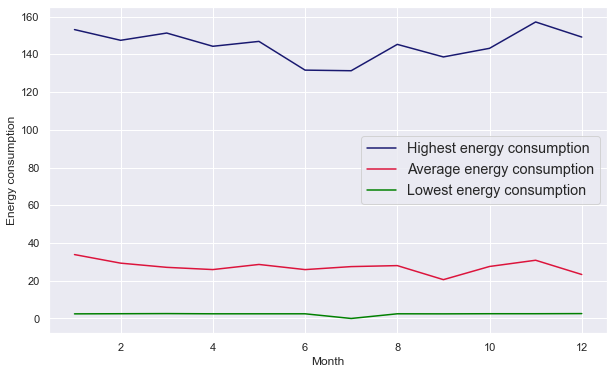

In [15]:
# Visualize energy consumption trends throughout the year in a line graph
labels = ['Highest energy consumption', 'Average energy consumption', 'Lowest energy consumption']
plt.figure(figsize = (10,6))
plt.plot(max_energy_consumption['month'], max_energy_consumption['Usage_kWh'], color = 'midnightblue')
plt.plot(avg_energy_consumption['month'], avg_energy_consumption['Usage_kWh'], color = 'crimson')
plt.plot(min_energy_consumption['month'], min_energy_consumption['Usage_kWh'], color = 'green')
plt.xlabel('Month')
plt.ylabel('Energy consumption')
plt.legend(labels = labels, fontsize = 'large')
plt.show()
# It seems average energy consumption is much closer to the lower end than the maximum energy consumption
# Production is probably running on low energy consumption much more frequently than medium or high energy consumption

In [16]:
# Create a table to demonstrate how many minutes each load type is used since data is recorded every 15 minutes
(df.groupby(['Day_of_week','Load_Type']).count())*15

date  Usage_kWh  \
Day_of_week Load_Type                        
Friday      Light_Load    32880      32880   
            Maximum_Load  18000      18000   
            Medium_Load   24000      24000   
Monday      Light_Load    34320      34320   
            Maximum_Load  18000      18000   
            Medium_Load   24000      24000   
Saturday    Light_Load    42960      42960   
            Maximum_Load  13680      13680   
            Medium_Load   18240      18240   
Sunday      Light_Load    60600      60600   
            Maximum_Load   6120       6120   
            Medium_Load    8160       8160   
Thursday    Light_Load    32880      32880   
            Maximum_Load  18000      18000   
            Medium_Load   24000      24000   
Tuesday     Light_Load    33720      33720   
            Maximum_Load  17640      17640   
            Medium_Load   23520      23520   
Wednesday   Light_Load    33720      33720   
            Maximum_Load  17640      17640   
            Medium_Load   23520      23520   

                          Lagging_Current_Reactive_Power_kVarh  \
Day_of_week Load_Type                                            
Friday      Light_Load                                   32880   
            Maximum_Load                                 18000   
            Medium_Load                                  24000   
Monday      Light_Load                                   34320   
            Maximum_Load                                 18000   
            Medium_Load                                  24000   
Saturday    Light_Load                                   42960   
            Maximum_Load                                 13680   
            Medium_Load                                  18240   
Sunday      Light_Load                                   60600   
            Maximum_Load                                  6120   
            Medium_Load                                   8160   
Thursday    Light_Load                                   32880   
            Maximum_Load                                 18000   
            Medium_Load                                  24000   
Tuesday     Light_Load                                   33720   
            Maximum_Load                                 17640   
            Medium_Load                                  23520   
Wednesday   Light_Load                                   33720   
            Maximum_Load                                 17640   
            Medium_Load                                  23520   

                          Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Day_of_week Load_Type                                                       
Friday      Light_Load                                   32880      32880   
            Maximum_Load                                 18000      18000   
            Medium_Load                                  24000      24000   
Monday      Light_Load                                   34320      34320   
            Maximum_Load                                 18000      18000   
            Medium_Load                                  24000      24000   
Saturday    Light_Load                                   42960      42960   
            Maximum_Load                                 13680      13680   
            Medium_Load                                  18240      18240   
Sunday      Light_Load                                   60600      60600   
            Maximum_Load                                  6120       6120   
            Medium_Load                                   8160       8160   
Thursday    Light_Load                                   32880      32880   
            Maximum_Load                                 18000      18000   
            Medium_Load                                  24000      24000   
Tuesday     Light_Load                                   33720      33720   
            Maximum_Load                                 17640 

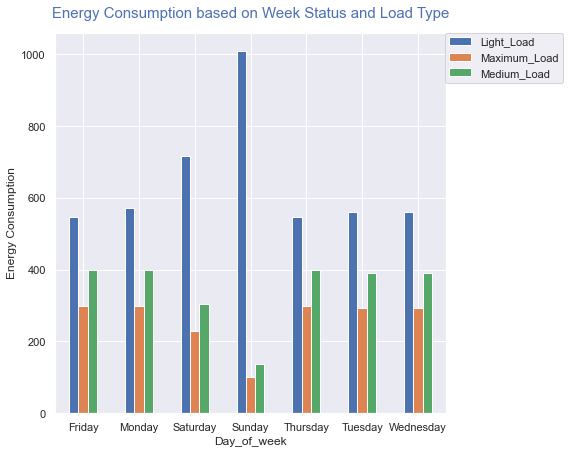

In [28]:
# Bar chart to demonstrate how many hours each load type is used by day throughout the year
plt.rcParams['figure.figsize'] = (7,7)
chart = ((df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].count())*15/60).unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day_of_week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()
# Light load is used considerably more often than maximum load explaining the energy consumption trend specially on weekends
# that was visualized previously

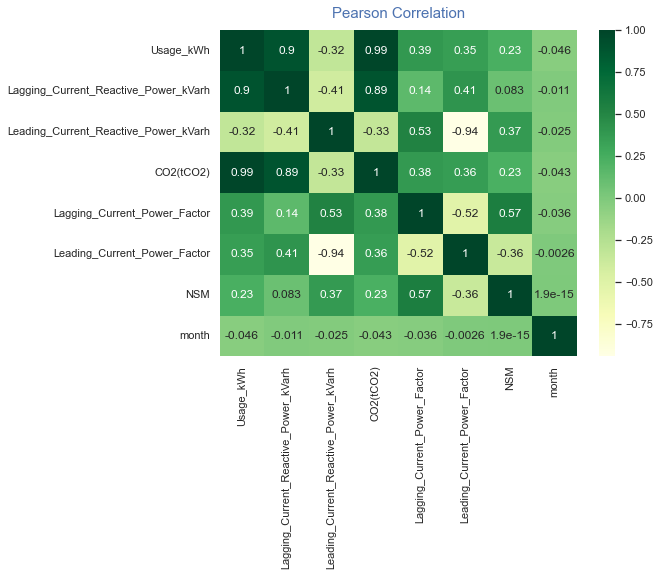

In [18]:
# Use Pearson correlation heatmap to visualze what parameters have correlation with each other
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'YlGn')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()
# Power Usage, Lagging current reactive power and CO2 emission seem to be correlated with each other

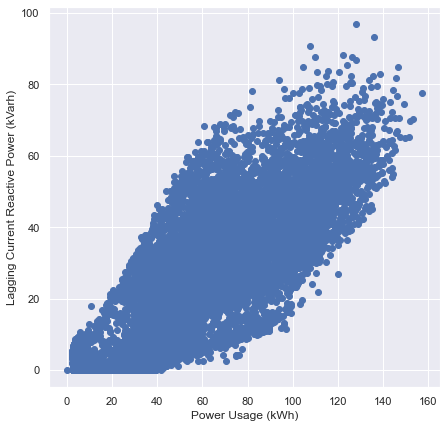

In [19]:
# Use a scatter plot to better visualize whether energy usage and Lagging current reactive power are correlated
plt.scatter(x = df['Usage_kWh'], y = df['Lagging_Current_Reactive_Power_kVarh'])
plt.xlabel("Power Usage (kWh)")
plt.ylabel("Lagging Current Reactive Power (kVarh)")
plt.show()
# The visibely are and the correlation is linear

In [58]:
# Use statsmodels to find out the linear coefficients of the correlation between energy usage and Lagging current reactive power
x = sm.add_constant(df['Usage_kWh'])
regression = sm.OLS(df['Lagging_Current_Reactive_Power_kVarh'],x).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Lagging_Current_Reactive_Power_kVarh   R-squared:                       0.803
Model:                                              OLS   Adj. R-squared:                  0.803
Method:                                   Least Squares   F-statistic:                 1.429e+05
Date:                                  Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                                          17:36:32   Log-Likelihood:            -1.1906e+05
No. Observations:                                 35040   AIC:                         2.381e+05
Df Residuals:                                     35038   BIC:                         2.382e+05
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0694      0.050     21.404      0.000       0.971       1.167
Usage_kWh      0.4369      0.001    378.016      0.000       0.435       0.439
==============================================================================
Omnibus:                     3301.584   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18144.776
Skew:                           0.288   Prob(JB):                         0.00
Kurtosis:                       6.478   Cond. No.                         55.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

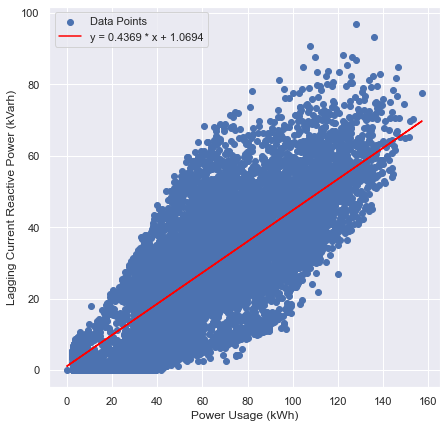

In [27]:
# Plot the line on the scatter plot graph
scatter_plot_labels=['Data Points','y = 0.4369 * x + 1.0694']
plt.scatter(x = df['Usage_kWh'], y = df['Lagging_Current_Reactive_Power_kVarh'])
plt.plot(df['Usage_kWh'],0.4369*df['Usage_kWh']+1.0694, c='red')
plt.xlabel("Power Usage (kWh)")
plt.ylabel("Lagging Current Reactive Power (kVarh)")
plt.legend(labels = scatter_plot_labels)
plt.show()